## 1.4.14 Hough Line Transform

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10, 3)

In [2]:
def plt_image(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

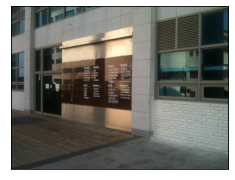

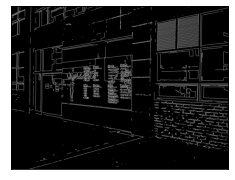

In [81]:
img = cv2.imread('dsu4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_eq = cv2.equalizeHist(gray)
edges = cv2.Canny(gray_eq,150,200,apertureSize = 3)
plt_image(img)
plt_image(edges)

In [82]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

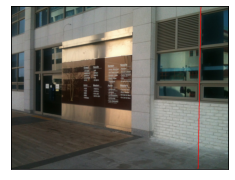

In [83]:
plt_image(img)

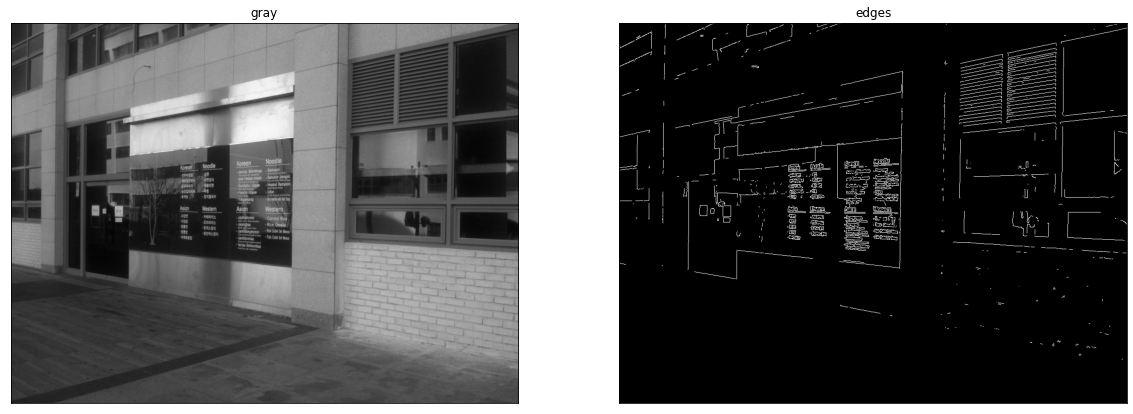

In [91]:
gray = cv2.imread('dsu4.jpg', 0)
edges = cv2.Canny(gray,150,200,apertureSize=3)

plt.figure(figsize = (20,40))
plt.subplot(1,2,1),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()

In [85]:
lines = cv2.HoughLines(edges,1,np.pi/180,150)
lines.shape[0]

20

In [87]:
img = cv2.imread('dsu4.jpg')
for i in range(lines.shape[0]):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho; y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

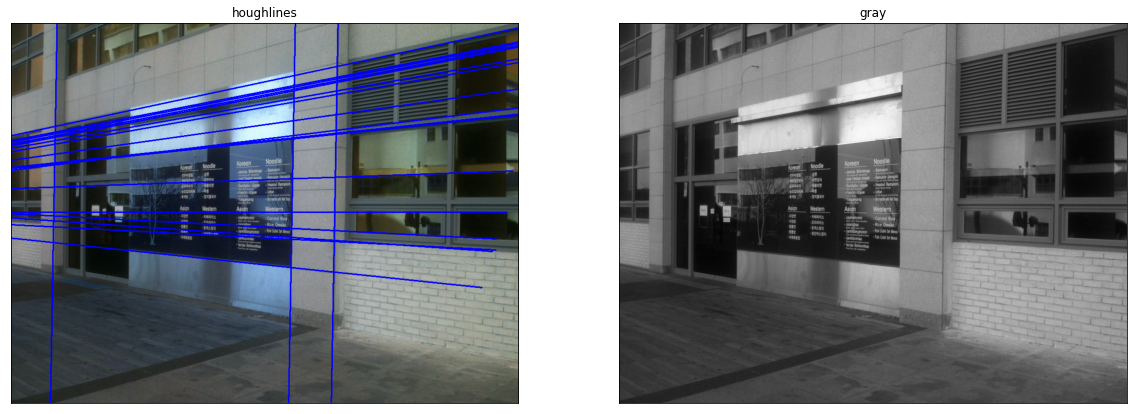

In [88]:
plt.figure(figsize = (20,40))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('houghlines'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
cv2.namedWindow('image')

# 트랙바 선언
cv2.createTrackbar('Number', 'image', 0, 100, lambda x: None)
cv2.createTrackbar('Threshold', 'image', 0, 500, lambda x: None)


while True:
    img = cv2.imread('dsu4.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 150, 200, apertureSize=3)
    
    number = cv2.getTrackbarPos('Number','image')
    threshold = cv2.getTrackbarPos('Threshold','image')
    
    lines = cv2.HoughLines(edges,1,np.pi/180, threshold)
    
    if lines is not None:
    
        for i in range(lines.shape[0]):
            if i > number:
                break
            for (rho, theta) in lines[i]:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho; y0 = b*rho
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
                cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)


    # 이미지 출력
    cv2.imshow("image", img)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()
cv2.waitKey(1)

[ WARN:0] global /private/var/folders/b7/g6qfbypj0tq32j5_trjh516r0000gn/T/pip-req-build-oqad5xi3/opencv/modules/highgui/src/window.cpp (704) createTrackbar UI/Trackbar(Number@image): Using 'value' pointer is unsafe and deprecated. Use NULL as value pointer. To fetch trackbar value setup callback.
[ WARN:0] global /private/var/folders/b7/g6qfbypj0tq32j5_trjh516r0000gn/T/pip-req-build-oqad5xi3/opencv/modules/highgui/src/window.cpp (704) createTrackbar UI/Trackbar(Threshold@image): Using 'value' pointer is unsafe and deprecated. Use NULL as value pointer. To fetch trackbar value setup callback.


-1

In [8]:
cv2.destroyAllWindows()
cv2.waitKey(1)

-1